##                             House Prices: Advanced Regression Techniques

# Introduction

In this notebook we will explore the dataset available. The goal of this challenge to estimate the price of houses in Ames, lowa. The dataset is available here :
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

# Preprocess

In [2]:
training_set = pd.read_csv('data/train.csv', index_col='Id')
test_set = pd.read_csv('data/test.csv', index_col='Id')
print ('The training set has {} rows and {} columns'.format(training_set.shape[0],training_set.shape[1]))
print('The test set has {} rows and {} columns'.format(test_set.shape[0],test_set.shape[1]))

The training set has 1460 rows and 80 columns
The test set has 1459 rows and 79 columns


In [3]:
training_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We can see that we have a large number of NaN. We are goind to fill those values. To do this we will look at the training set and the test set simultaneously

# Find and delete outliers

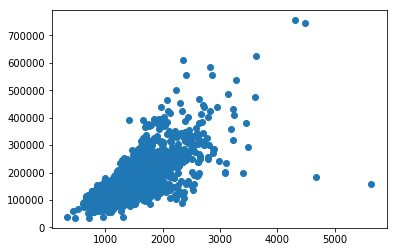

In [5]:
plt.scatter(x = training_set.GrLivArea,y = training_set.SalePrice)
plt.show()

In [6]:
training_set=training_set[training_set['GrLivArea'] < 4000]

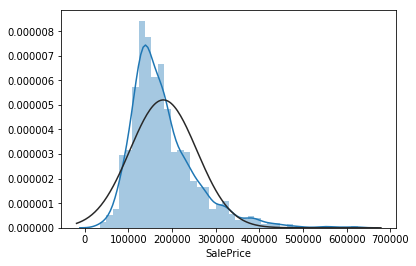

mu=180151.2335164835, sigma=76670.24989058504


In [7]:
sns.distplot(training_set.SalePrice, fit=stats.norm)
plt.show()

# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(training_set['SalePrice'])
print ('mu={}, sigma={}'.format(mu, sigma))


We have a non normal distribution. For most models they are more accurate if the distribution is normal

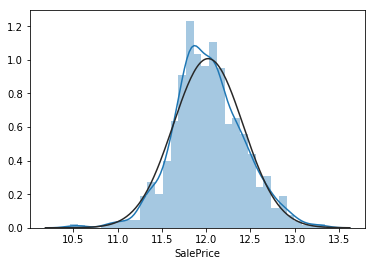

mu=12.021943004918326, sigma=0.39594380607482005


In [8]:
transformed_SalePrice = np.log(training_set.SalePrice)
sns.distplot(transformed_SalePrice, fit=stats.norm)
plt.show()

# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(transformed_SalePrice)
print ('mu={}, sigma={}'.format(mu, sigma))

In [9]:
ntrain = training_set.shape[0]
data_set = training_set.append(test_set)
series_nan=data_set.isnull().sum()
series_nan[series_nan>0]

Alley           2717
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2345
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2810
PoolQC          2907
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [10]:
#training_set=training_set.drop(['Fence','PoolQC'], axis=1)
values={
    'Alley':'None',
    'BsmtQual':'None', 'BsmtCond':'None', 'BsmtExposure':'None', 'BsmtFinType1':'None', 'BsmtFinType2':'None', 'BsmtFinSF1':0, 'BsmtFinSF2':0, 'BsmtFullBath':0 ,'BsmtHalfBath':0 ,'BsmtUnfSF':0,
    'MasVnrType':'None', 'MasVnrArea':0,
    'FireplaceQu':'None','Functional':'Typ',        
    'GarageType':'None','GarageYrBlt':'None','GarageFinish':'None','GarageQual':'None','GarageCond':'None', 'GarageArea':0, 'GarageCars':0,
    'PoolQC':'None',
    'Fence':'None',
    'MiscFeature':'None',
    'TotalBsmtSF': 0}
data_set=data_set.fillna(value=values)

Attention il faut regarde lot frontage de plus près
On peut supprimer Alley à mon avis
De même pour Utilities
De même pour Condition2
RoofMatl

In [11]:
data_set.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     441
Wd Sdng     410
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64

In [12]:
data_set=data_set.fillna({'Exterior1st':'VinylSd'})

In [13]:
data_set.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     405
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      14
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [14]:
data_set=data_set.fillna({'Exterior2nd':'VinylSd'})

In [15]:
data_set.Electrical.value_counts()

SBrkr    2667
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [16]:
data_set=data_set.fillna({'Electrical':'SBrkr'})

In [17]:
data_set.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     201
Fa      70
Name: KitchenQual, dtype: int64

In [18]:
data_set=data_set.fillna({'KitchenQual':'TA'})

In [19]:
data_set.MSZoning.value_counts()

RL         2261
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [20]:
data_set=data_set.fillna({'MSZoning':'RL'})

In [21]:
data_set.SaleType.value_counts()

WD       2523
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [22]:
data_set=data_set.fillna({'SaleType':'WD'})

In [23]:
data_set.Utilities.value_counts()
d=data_set.pop('Utilities')

Ne pas oublier de regarder le prépocess sur le test set; faire une fonction ou voir si il est différent

# Data exploration

In this section we well see how data are distributed ....

We can clearly see some outliers. We can delete them

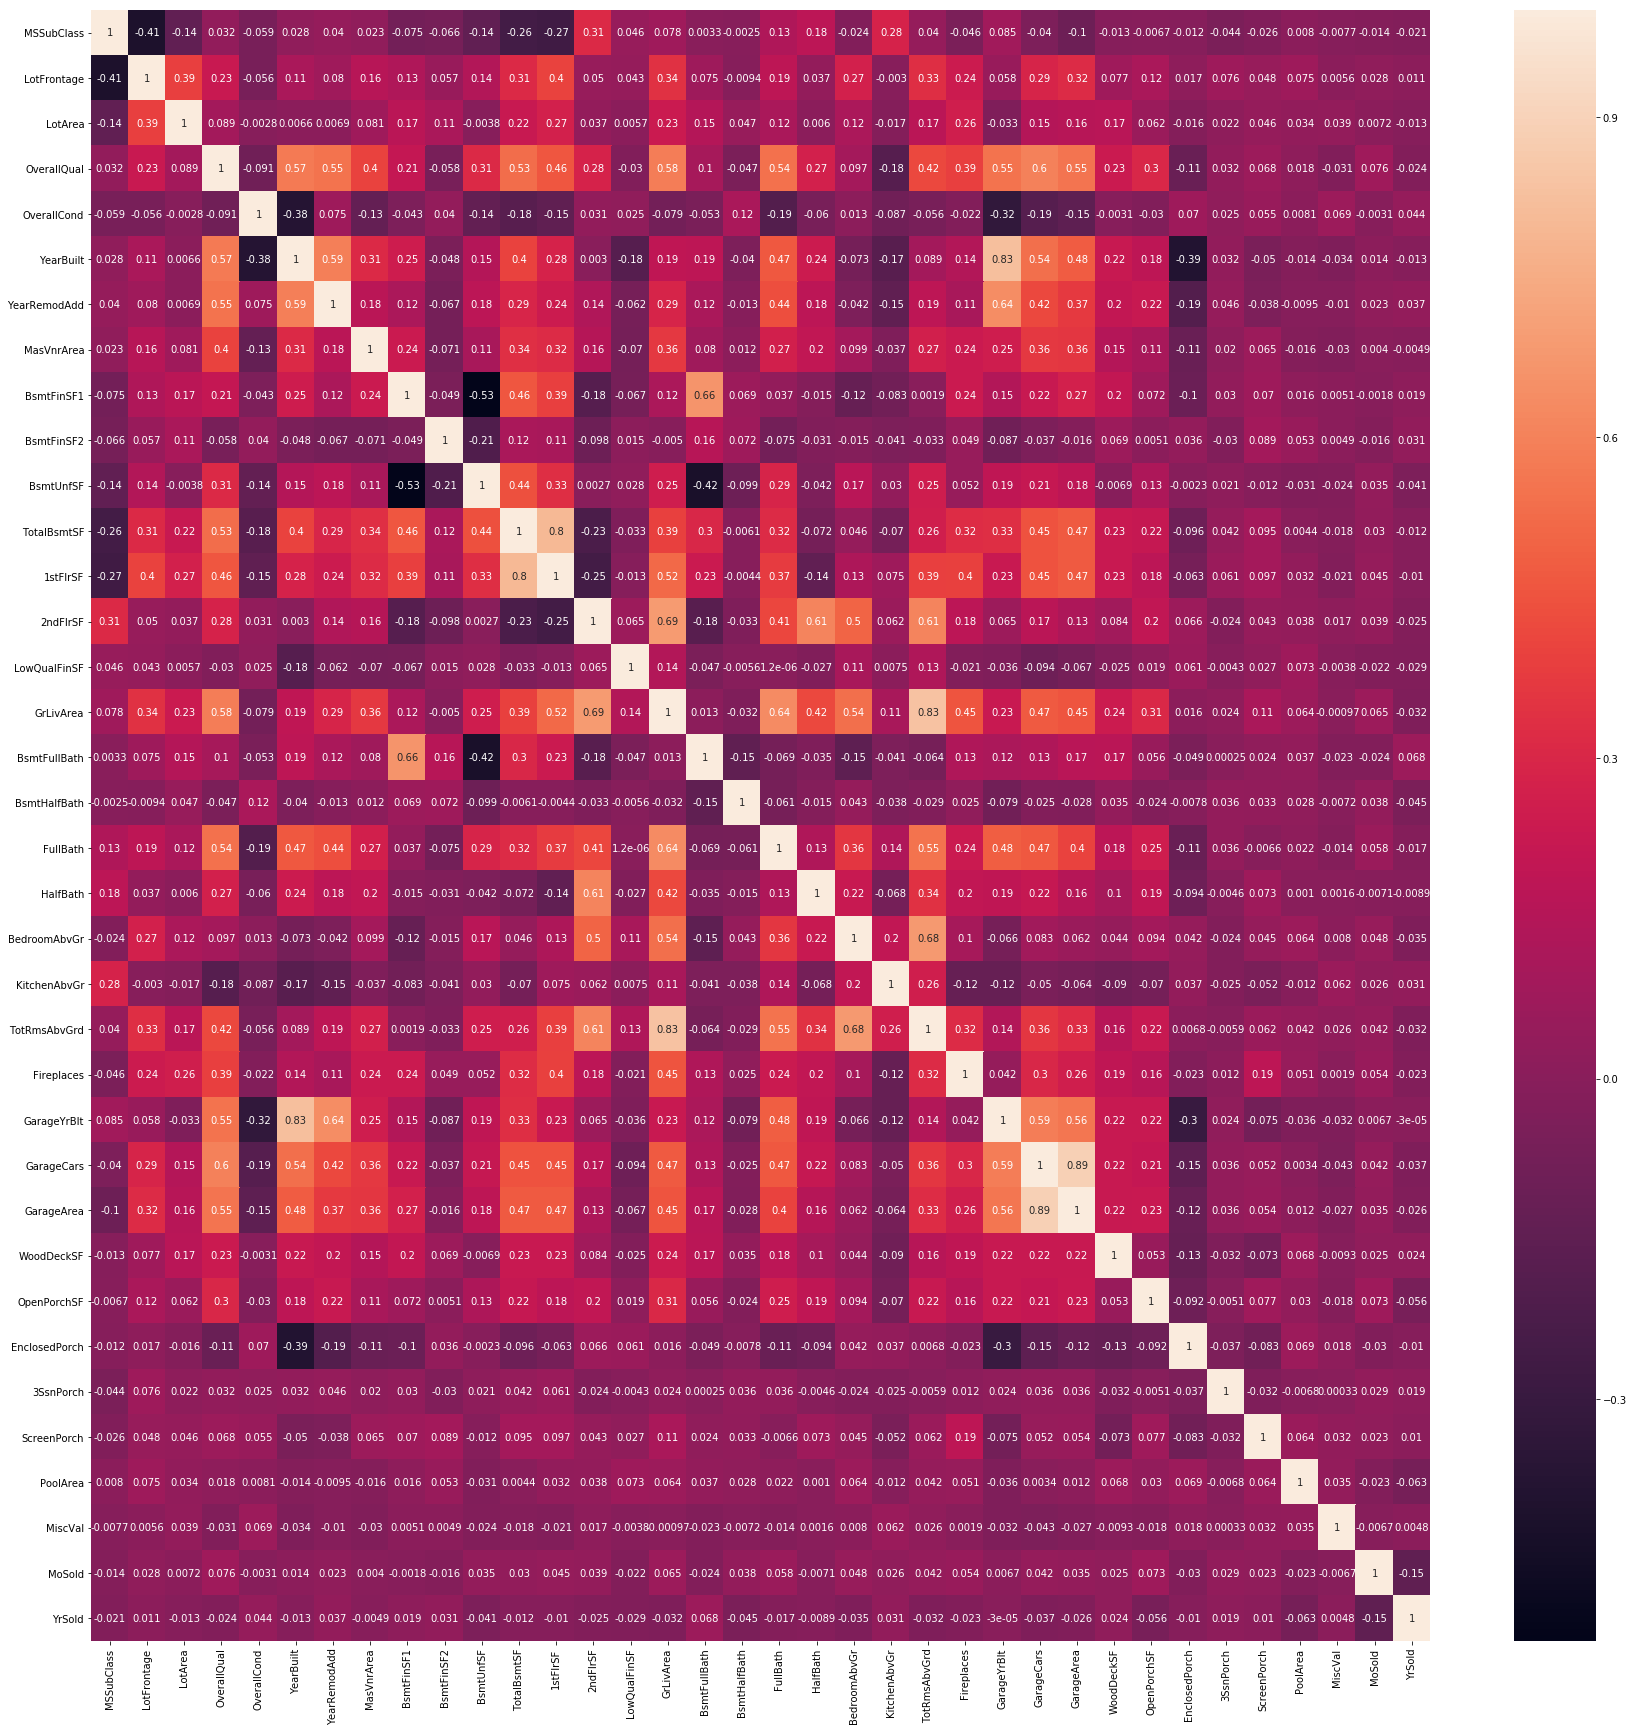

In [24]:
x_training_set = training_set.drop('SalePrice',axis=1)
y_training_set = training_set['SalePrice']

plt.figure(figsize=(30,30))
sns.heatmap(x_training_set.corr(), annot=True)
plt.show()

For more visibility

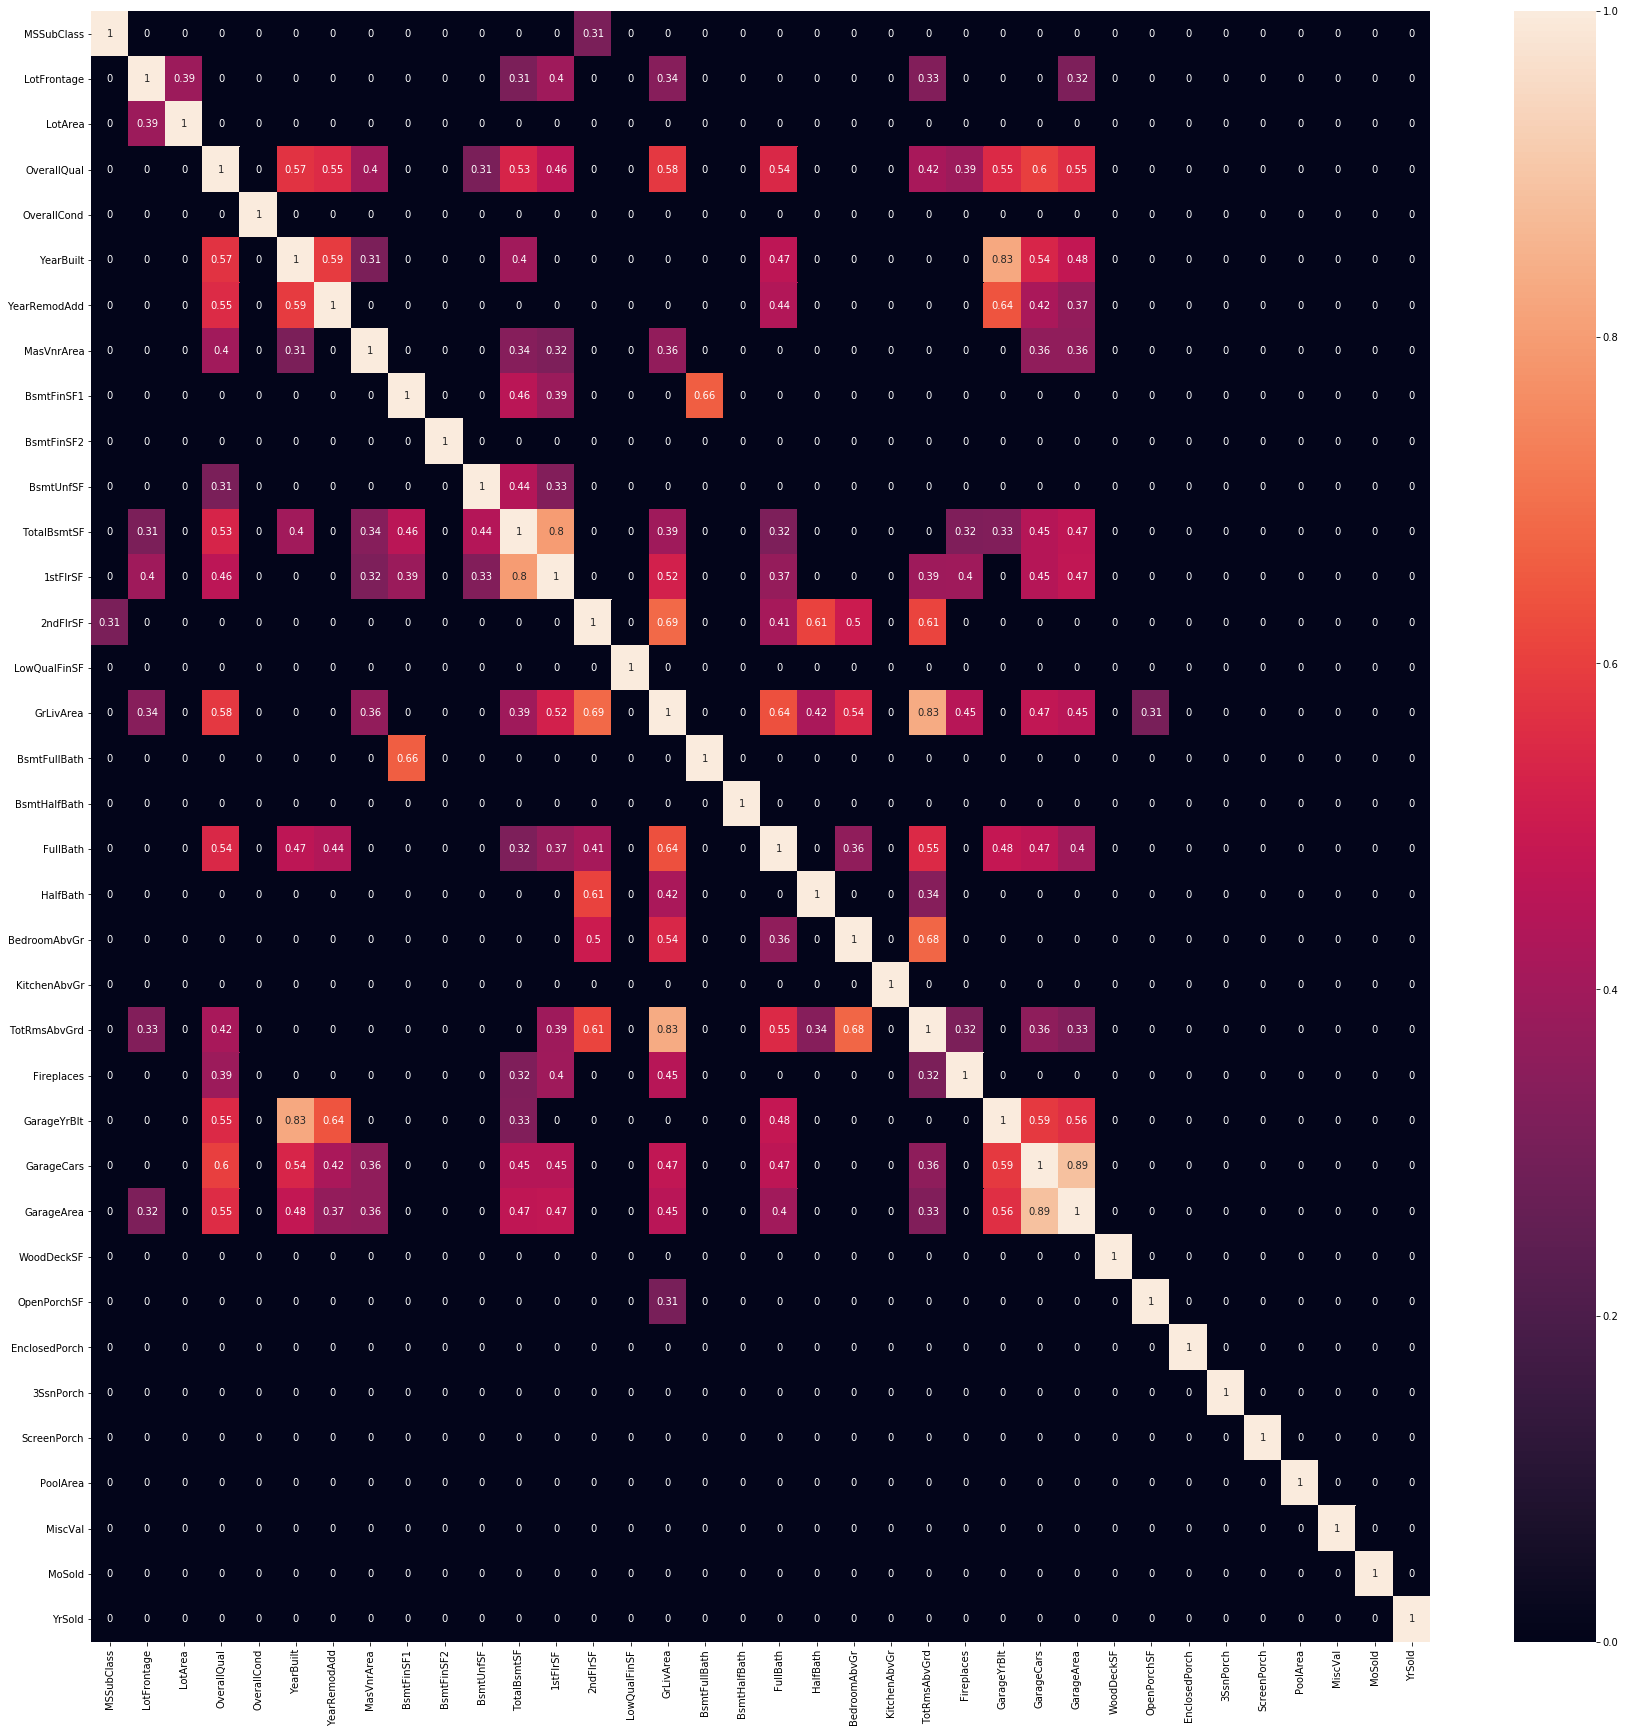

In [25]:
corr_matrix=x_training_set.corr()
corr_matrix[corr_matrix<0.3]=0
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Changer l'endroit, fin et supprimer les features trop corrélées

Then we have 
    features highly correlated : garageCars/GarageArea
                                 TotRmsAbvGrd/1stflrSF

In [26]:
print(data_set.columns)
data_set.pop('SalePrice')

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
6       143000.0
7       307000.0
8       200000.0
9       129900.0
10      118000.0
11      129500.0
12      345000.0
13      144000.0
14      279500.0
15      157000.0
16      132000.0
17      149000.0
18       90000.0
19      159000.0
20      139000.0
21      325300.0
22      139400.0
23      230000.0
24      129900.0
25      154000.0
26      256300.0
27      134800.0
28      306000.0
29      207500.0
30       68500.0
          ...   
2890         NaN
2891         NaN
2892         NaN
2893         NaN
2894         NaN
2895         NaN
2896         NaN
2897         NaN
2898         NaN
2899         NaN
2900         NaN
2901         NaN
2902         NaN
2903         NaN
2904         NaN
2905         NaN
2906         NaN
2907         NaN
2908         NaN
2909         NaN
2910         NaN
2911         NaN
2912         NaN
2913         NaN
2914         NaN
2915         NaN
2916         NaN
2917       

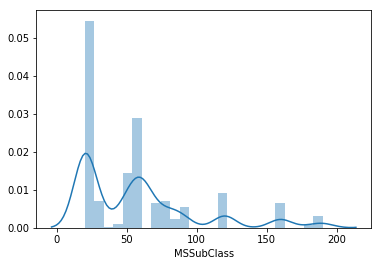

In [27]:
sns.distplot(data_set.MSSubClass)
plt.show()

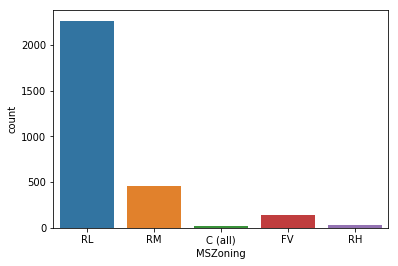

In [28]:
sns.countplot(data_set.MSZoning)
plt.show()

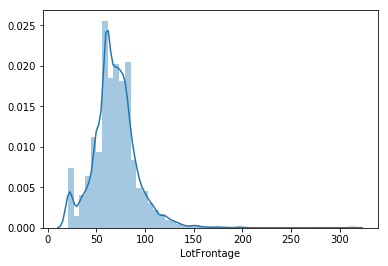

In [29]:
sub_data_set=data_set[data_set['LotFrontage'].notna()]
sns.distplot(sub_data_set.LotFrontage)
plt.show()

c:\users\i351309\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


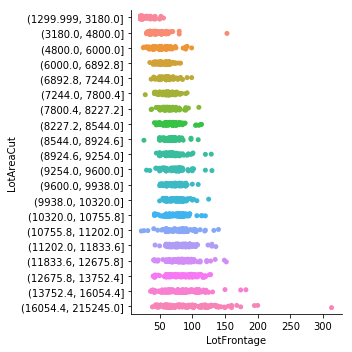

In [30]:
sub_data_set['LotAreaCut'] = pd.qcut(sub_data_set.LotArea,20)
sns.catplot(x='LotFrontage', y='LotAreaCut', data=sub_data_set)
plt.show()

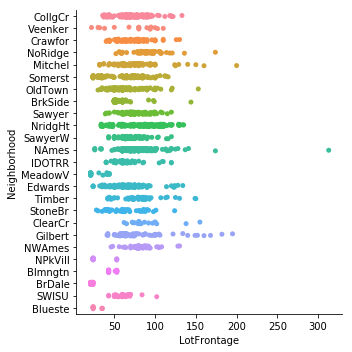

In [31]:
sns.catplot(x='LotFrontage', y='Neighborhood', data=sub_data_set)
plt.show()

In [32]:
sub_data_set[['LotFrontage','Neighborhood']].groupby('Neighborhood').describe()

LotFrontage                                                   \
                   count       mean        std   min    25%   50%     75%   
Neighborhood                                                                
Blmngtn             20.0  46.900000   4.919350  43.0  43.00  43.0   53.00   
Blueste             10.0  27.300000   5.313505  24.0  24.00  24.0   32.25   
BrDale              30.0  21.500000   1.137147  21.0  21.00  21.0   21.00   
BrkSide             95.0  55.789474  12.722818  50.0  50.00  51.0   58.50   
ClearCr             20.0  88.150000  22.628057  62.0  78.00  80.5   93.25   
CollgCr            220.0  71.336364  15.940401  36.0  64.00  70.0   78.00   
Crawfor             83.0  69.951807  19.141262  40.0  54.00  70.0   80.00   
Edwards            176.0  65.153409  18.207825  24.0  58.00  64.5   74.00   
Gilbert            111.0  74.207207  28.386654  41.0  59.00  64.0   75.00   
IDOTRR              87.0  62.241379  15.454333  40.0  51.00  60.0   63.50   
MeadowV             33.0  25.606061   8.521808  21.0  21.00  21.0   21.00   
Mitchel             90.0  75.144444  26.794499  32.0  62.00  74.0   80.00   
NAmes              375.0  75.210667  19.686198  26.0  66.00  73.0   80.00   
NPkVill             21.0  28.142857  10.398489  24.0  24.00  24.0   24.00   
NWAmes              85.0  81.517647  12.156335  46.0  78.00  80.0   85.00   
NoRidge             52.0  90.076923  20.135664  52.0  82.00  88.5   97.25   
NridgHt            163.0  84.184049  26.685697  34.0  61.50  92.0  105.00   
OldTown            229.0  61.777293  15.642896  30.0  52.00  60.0   63.00   
SWISU               44.0  59.068182   9.912167  43.0  51.75  60.0   60.00   
Sawyer              98.0  74.551020  15.165154  39.0  65.00  72.0   83.50   
SawyerW            106.0  70.669811  14.384331  43.0  63.00  67.0   79.75   
Somerst            162.0  64.549383  23.984740  24.0  39.25  72.5   82.50   
StoneBr             46.0  62.173913  21.696189  28.0  41.50  60.0   80.75   
Timber              57.0  81.157895  23.202362  42.0  73.00  82.0   88.00   
Veenker             16.0  72.000000  28.637970  22.0  47.00  80.0   94.25   

                     
                max  
Neighborhood         
Blmngtn        53.0  
Blueste        35.0  
BrDale         24.0  
BrkSide       144.0  
ClearCr       155.0  
CollgCr       133.0  
Crawfor       130.0  
Edwards       134.0  
Gilbert       195.0  
IDOTRR        120.0  
MeadowV        44.0  
Mitchel       200.0  
NAmes         313.0  
NPkVill        53.0  
NWAmes        130.0  
NoRidge       174.0  
NridgHt       135.0  
OldTown       153.0  
SWISU         102.0  
Sawyer        120.0  
SawyerW       120.0  
Somerst       116.0  
StoneBr       124.0  
Timber        150.0  
Veenker       110.0

In [33]:
description = sub_data_set[['LotFrontage','LotAreaCut']].groupby('LotAreaCut').describe()
description

LotFrontage                                           \
                          count       mean        std   min    25%   50%   
LotAreaCut                                                                 
(1299.999, 3180.0]        123.0  25.658537   7.408269  21.0  21.00  24.0   
(3180.0, 4800.0]          123.0  45.227642  14.531939  30.0  35.00  43.0   
(4800.0, 6000.0]          131.0  52.870229  12.580447  25.0  50.00  50.0   
(6000.0, 6892.8]          109.0  56.587156   7.934000  35.0  51.00  55.0   
(6892.8, 7244.0]          122.0  61.065574   8.982755  37.0  60.00  60.0   
(7244.0, 7800.4]          121.0  63.495868   9.485185  28.0  60.00  63.0   
(7800.4, 8227.2]          121.0  65.520661  11.115379  37.0  60.00  65.0   
(8227.2, 8544.0]          123.0  67.552846  12.482908  42.0  60.00  65.0   
(8544.0, 8924.6]          120.0  68.508333  10.244897  26.0  64.00  70.0   
(8924.6, 9254.0]          122.0  70.155738  12.688265  45.0  60.75  70.0   
(9254.0, 9600.0]          139.0  72.676259  13.751003  30.0  61.50  75.0   
(9600.0, 9938.0]          104.0  72.413462  10.700341  50.0  65.00  74.0   
(9938.0, 10320.0]         123.0  75.487805  12.167793  50.0  65.00  77.0   
(10320.0, 10755.8]        119.0  76.806723  14.067800  42.0  67.50  80.0   
(10755.8, 11202.0]        122.0  75.073770  18.634886  22.0  60.00  74.0   
(11202.0, 11833.6]        121.0  82.561983  15.365488  43.0  75.00  80.0   
(11833.6, 12675.8]        121.0  83.826446  18.959465  41.0  74.00  82.0   
(12675.8, 13752.4]        122.0  84.827869  20.302950  40.0  68.50  85.0   
(13752.4, 16054.4]        121.0  86.132231  25.590670  36.0  69.00  85.0   
(16054.4, 215245.0]       122.0  96.967213  39.661571  39.0  66.00  93.5   

                                    
                        75%    max  
LotAreaCut                          
(1299.999, 3180.0]    24.00   56.0  
(3180.0, 4800.0]      53.00  153.0  
(4800.0, 6000.0]      60.00   99.0  
(6000.0, 6892.8]      62.00   82.0  
(6892.8, 7244.0]      64.00   99.0  
(7244.0, 7800.4]      70.00   92.0  
(7800.4, 8227.2]      70.00  110.0  
(8227.2, 8544.0]      70.50  114.0  
(8544.0, 8924.6]      73.00  109.0  
(8924.6, 9254.0]      75.00  129.0  
(9254.0, 9600.0]      80.00  130.0  
(9600.0, 9938.0]      80.00  109.0  
(9938.0, 10320.0]     83.00  125.0  
(10320.0, 10755.8]    85.00  120.0  
(10755.8, 11202.0]    85.00  140.0  
(11202.0, 11833.6]    90.00  136.0  
(11833.6, 12675.8]    94.00  152.0  
(12675.8, 13752.4]   100.75  128.0  
(13752.4, 16054.4]   105.00  182.0  
(16054.4, 215245.0]  120.00  313.0

In [34]:
for  index, row in data_set[data_set['LotFrontage'].isna()].iterrows():
    for interval in description.index:
        if row['LotArea'] in interval:
            data_set.at[index,'LotFrontage'] =description.loc[description.index[0]][1]

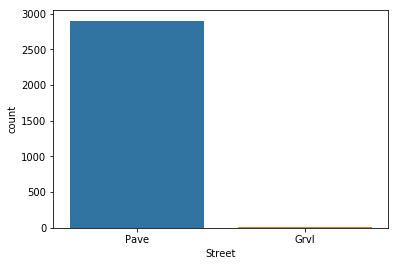

In [35]:
sns.countplot(data_set.Street)
plt.show()

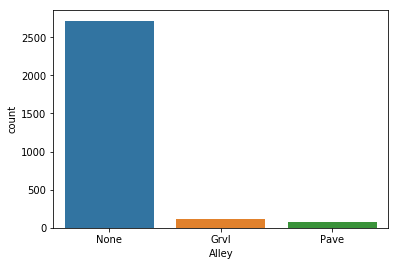

In [36]:
sns.countplot(data_set.Alley)
plt.show()

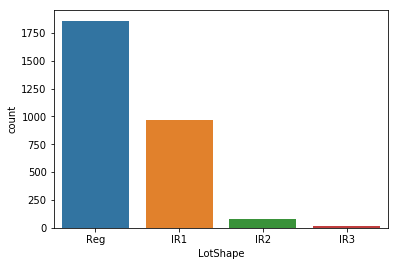

In [37]:
sns.countplot(data_set.LotShape)
plt.show()

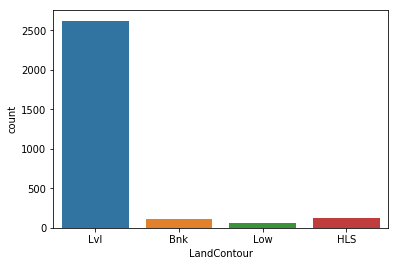

In [38]:
sns.countplot(data_set.LandContour)
plt.show()

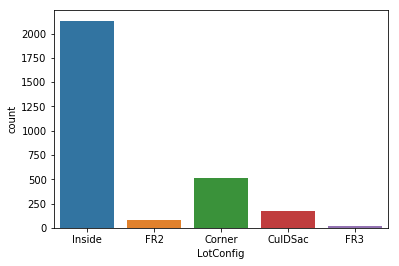

In [39]:
sns.countplot(data_set.LotConfig)
plt.show()

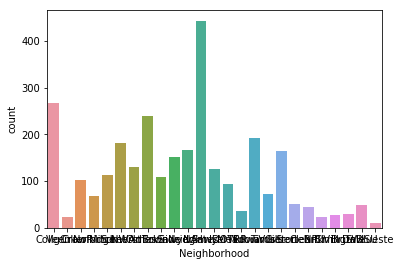

In [40]:
sns.countplot(data_set.Neighborhood)
plt.show()

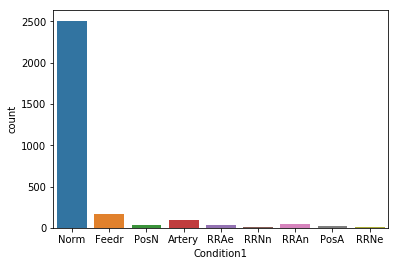

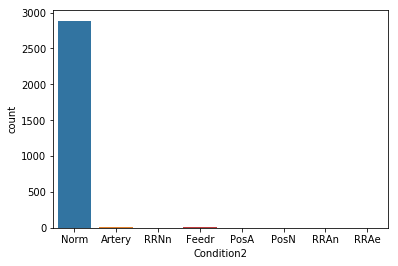

2886

In [41]:
sns.countplot(data_set.Condition1)
plt.show()
sns.countplot(data_set.Condition2)
plt.show()
data_set.Condition2[data_set.Condition2 == 'Norm'].count()

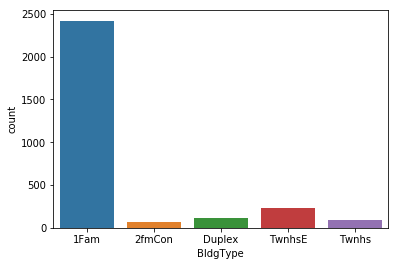

In [42]:
sns.countplot(data_set.BldgType)
plt.show()

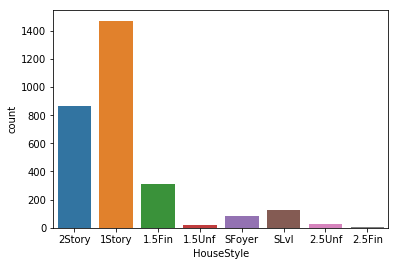

In [43]:
sns.countplot(data_set.HouseStyle)
plt.show()

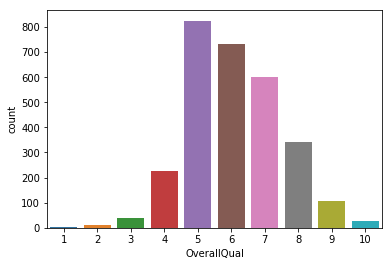

In [44]:
sns.countplot(data_set.OverallQual)
plt.show()

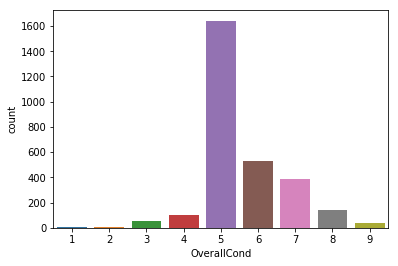

In [45]:
sns.countplot(data_set.OverallCond)
plt.show()

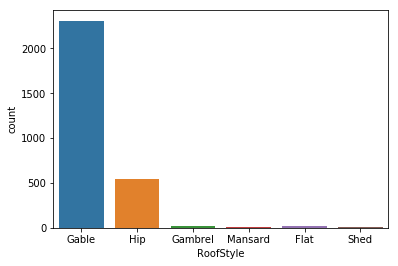

In [46]:
sns.countplot(data_set.RoofStyle)
plt.show()

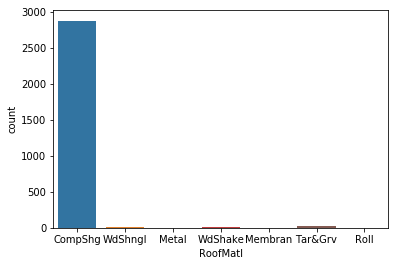

2874

In [47]:
sns.countplot(data_set.RoofMatl)
plt.show()
data_set.RoofMatl[data_set.RoofMatl == 'CompShg'].count()

In [48]:
description=data_set.describe()
print(description.columns)
description

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,...,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,1156.821269,334.741338,2.605832,2.859348,437.947856,49.633276,0.428816,0.061063,560.445969,23.130017,...,5.565009,6.083705,1.899828,16.084391,6.445626,1048.027101,93.503945,1971.271698,1984.240480,2007.793482
std,383.956821,426.116353,25.205266,0.822707,442.870422,169.285205,0.523956,0.245153,439.751583,64.282620,...,1.113718,1.403444,33.020598,56.219760,1.562047,428.113748,126.455095,30.290998,20.897341,1.315615
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,5.000000,0.000000,0.000000,5.000000,792.500000,0.000000,1953.000000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.000000,0.000000,...,5.000000,6.000000,0.000000,0.000000,6.000000,988.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1383.500000,703.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,803.500000,0.000000,...,6.000000,7.000000,0.000000,0.000000,7.000000,1300.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,1862.000000,508.000000,8.000000,4010.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,9.000000,10.000000,800.000000,576.000000,15.000000,5095.000000,1424.000000,2010.000000,2010.000000,2010.000000


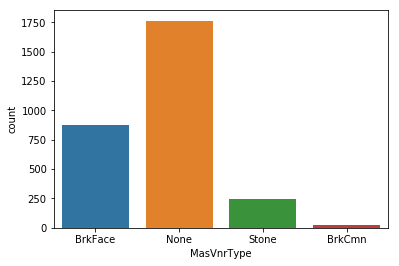

In [49]:
sns.countplot(data_set.MasVnrType)
plt.show()

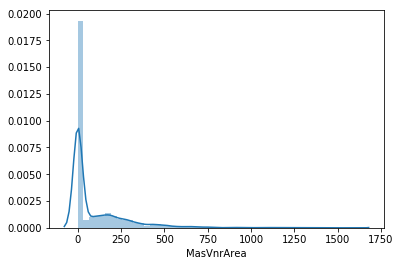

In [50]:
sub_data_set=data_set[data_set['MasVnrArea'].notna()]
sns.distplot(sub_data_set.MasVnrArea+1)
plt.show()

In [51]:
d=data_set.PavedDrive.astype('str')

1.2530114068342657 0.02527519032059496


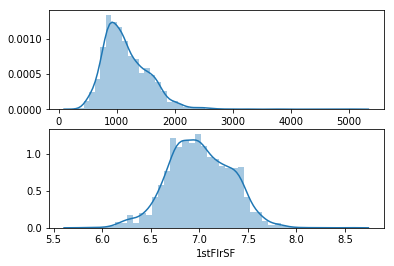

0.8432368612573441 0.3080752244319113


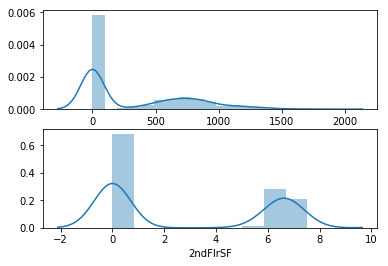

11.368093787070745 8.818975825247005


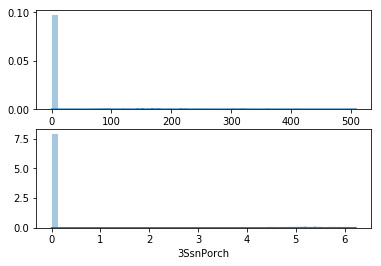

0.32812867740994417 -0.9823084425788335


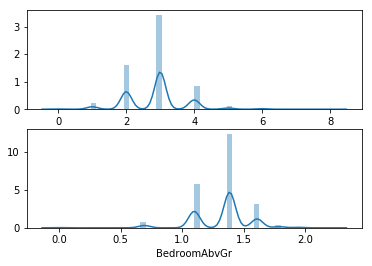

0.9741383947935343 -0.6156866102800139


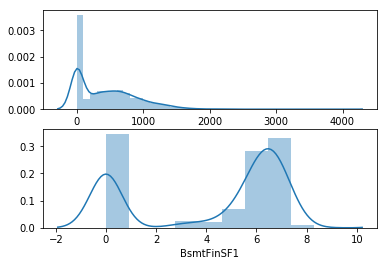

4.142862810484008 2.4600349863542283


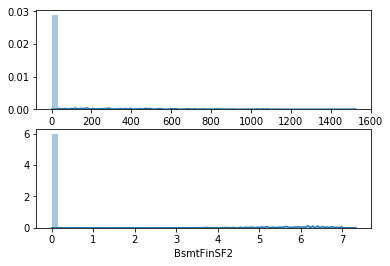

0.6228197534735802 0.42565048935793004


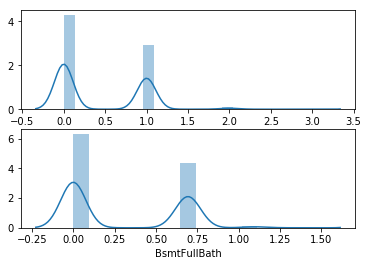

3.9428915855295625 3.785015080248049


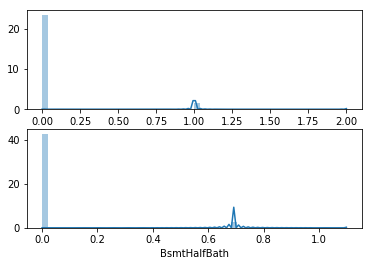

0.9201354107515056 -2.153281526703297


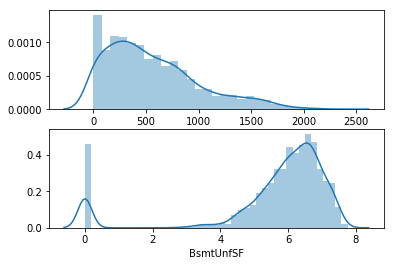

4.000796390171008 1.958822044916447


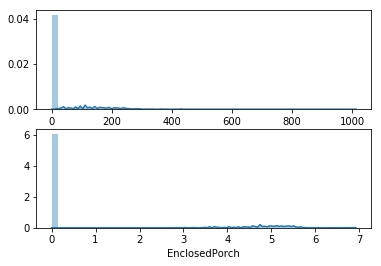

0.7259576319443649 0.23646536978350077


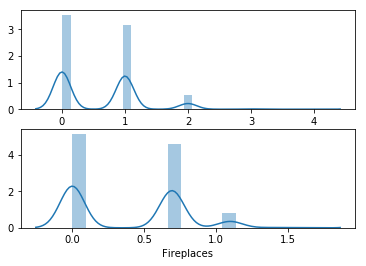

0.15991726181327875 -0.25289643363726233


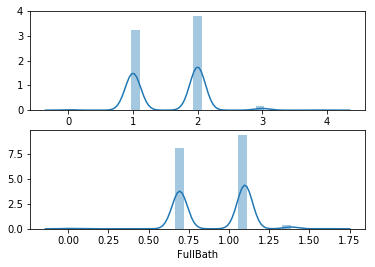

0.21774790273759267 -3.5097130983541227


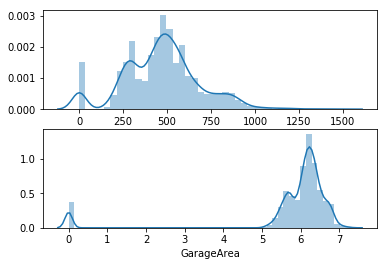

-0.21940152790983602 -1.2758698426427446


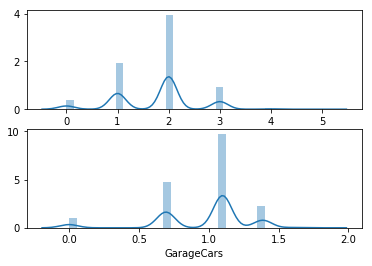

0.977860375775408 -0.044670861058304305


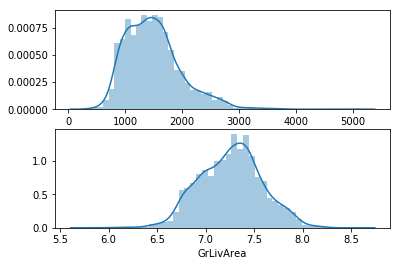

0.6987701695104503 0.5846386860117734


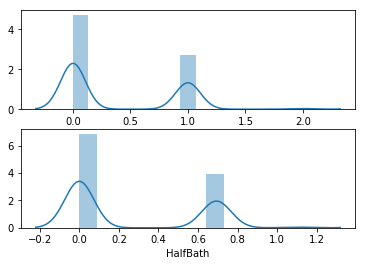

4.298845188878568 3.5174150806984414


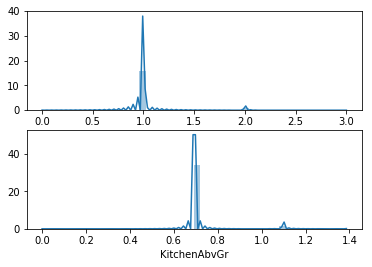

13.123758076814687 -0.5329756259120538


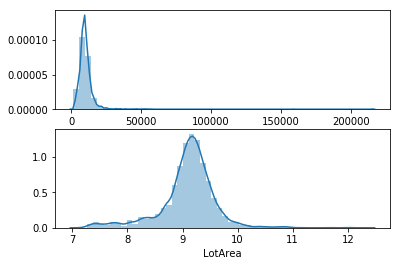

0.6915820611038802 -0.5546717154623997


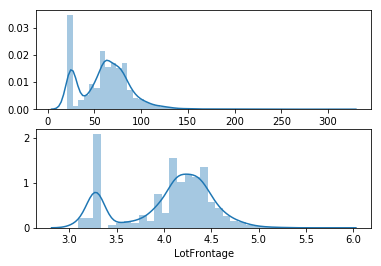

12.080315112009986 8.551586801612336


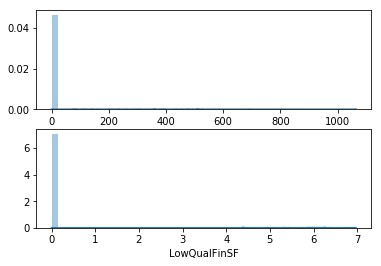

1.3748040186039363 0.24670272883005304


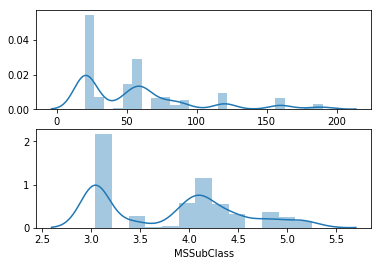

2.6006965931934847 0.5383915800922556


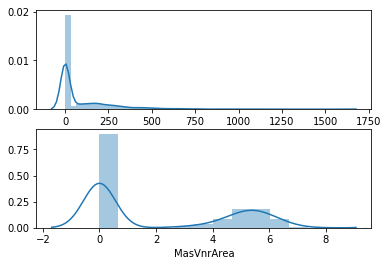

21.93214695358919 5.210024836889633


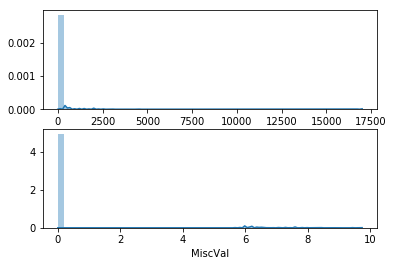

0.19841068445097648 -0.8717553868950331


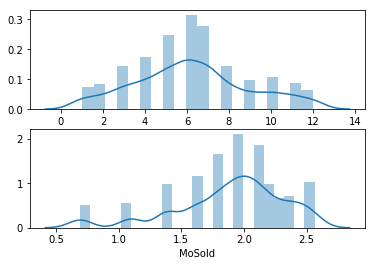

2.5292454582791652 -0.04024725418513654


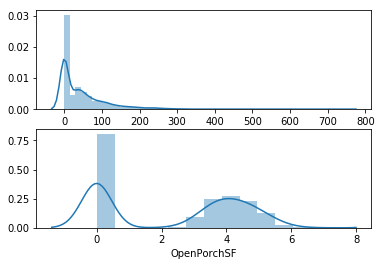

0.5691429746178615 -0.7467920764277808


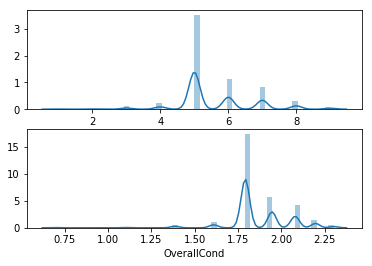

0.18190153652221036 -0.6595485489837261


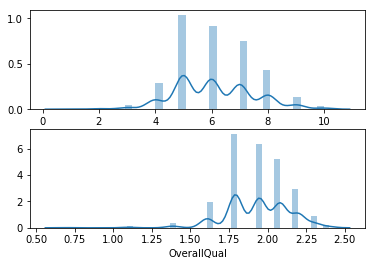

18.70182861751318 16.332187275096278


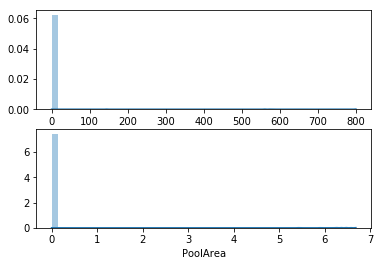

3.9435081140576256 2.9432338232902624


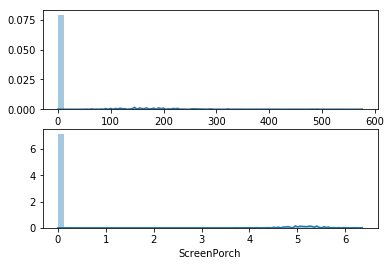

0.7495786221874003 0.02713056612790184


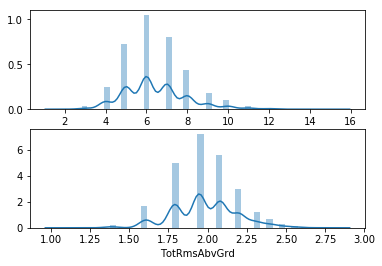

0.6626565594522323 -4.965294227239192


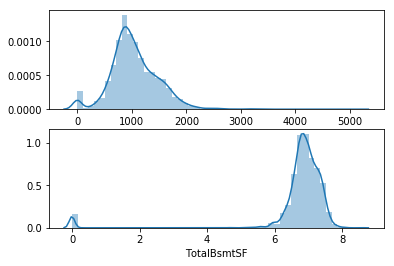

1.8482845059023552 0.16093621962108873


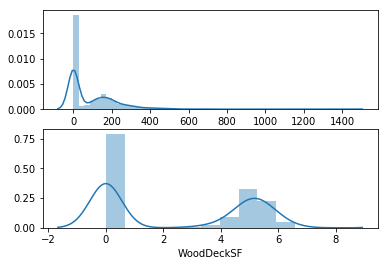

-0.5980872674538305 -0.6245130553803345


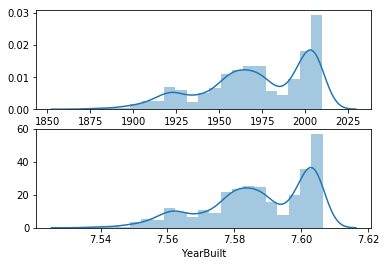

-0.44911340885780543 -0.4562479035223195


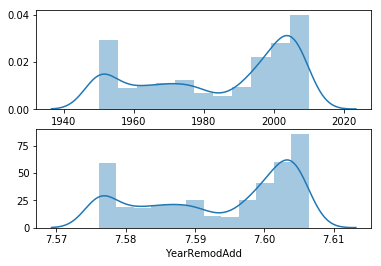

0.1309093948097276 0.13009812860782258


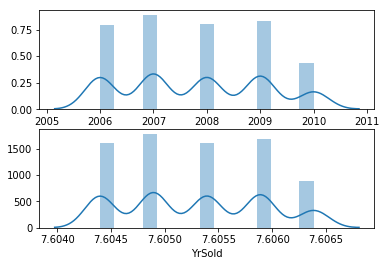

In [52]:
for column in description.columns:
    f, (ax1, ax2) = plt.subplots(2)
    sns.distplot(data_set[column], axlabel=column, ax=ax1)
    sns.distplot(np.log(data_set[column]+1), axlabel=column, ax=ax2)
    print(stats.skew(data_set[column]),stats.skew(np.log(data_set[column]+1)))
    plt.show()

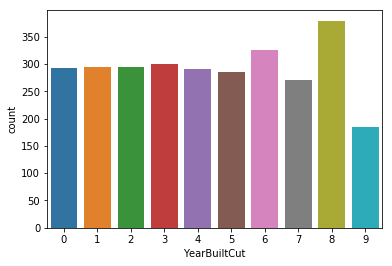

In [53]:
sub_data_set['YearBuiltCut'] = pd.qcut(data_set.YearBuilt,10)
le = preprocessing.LabelEncoder()
sub_data_set['YearBuiltCut']=le.fit_transform(sub_data_set['YearBuiltCut'])
sns.countplot(sub_data_set['YearBuiltCut'])
plt.show()
data_set['YearBuiltCut']=sub_data_set['YearBuiltCut'].astype('str')

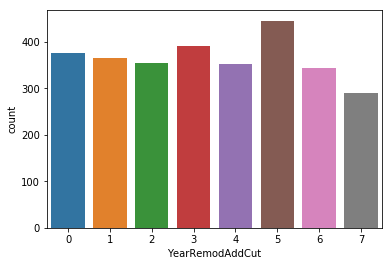

In [54]:
sub_data_set['YearRemodAddCut'] = pd.qcut(data_set.YearRemodAdd,8)
le = preprocessing.LabelEncoder()
sub_data_set['YearRemodAddCut']=le.fit_transform(sub_data_set['YearRemodAddCut'])
sns.countplot(sub_data_set['YearRemodAddCut'])
plt.show()
data_set['YearRemodAddCut']=sub_data_set['YearRemodAddCut'].astype('str')

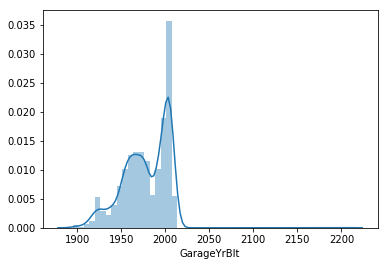

In [55]:
sns.distplot(data_set.GarageYrBlt[data_set.GarageYrBlt!='None'].astype('int64'))
plt.show()

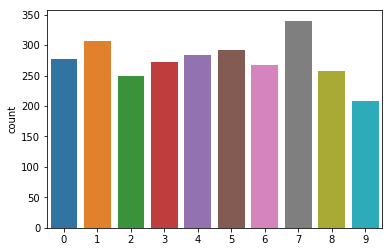

In [56]:
GarageData = data_set.GarageYrBlt[data_set.GarageYrBlt!='None'].astype('int64')
GarageData.index
foo = pd.qcut(GarageData,10)
le = preprocessing.LabelEncoder()
foo=le.fit_transform(foo)
sns.countplot(foo)
plt.show()
data_set['GarageYrBltCut']=pd.DataFrame(foo,index=GarageData.index)
data_set['GarageYrBltCut']=data_set['GarageYrBltCut'].fillna('None')

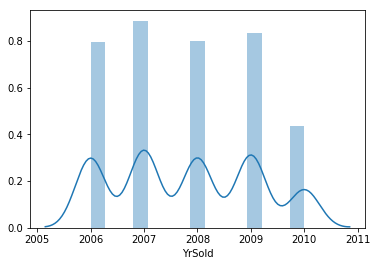

In [57]:
sns.distplot(data_set.YrSold)
plt.show()

On peut regarder month Sold pour rentre le truc plus normal

# Creating some features

In [58]:
data_set['TotalArea'] = data_set['GrLivArea'] + data_set['1stFlrSF'] + data_set['2ndFlrSF']
data_set['TimePassedYearBuilt'] = data_set['YrSold']-data_set['YearBuilt']
data_set['TimePassedYearRemodAdd'] = data_set['YrSold']-data_set['YearRemodAdd']

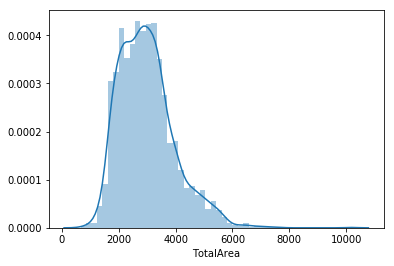

In [59]:
sns.distplot(data_set.TotalArea)
plt.show()

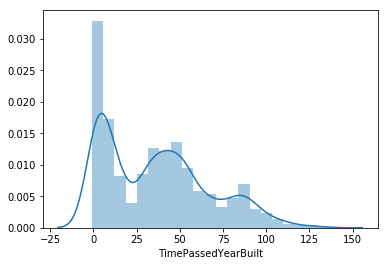

In [60]:
sns.distplot(data_set.TimePassedYearBuilt)
plt.show()

In [61]:
data_set['TimePassedYearRemodAdd'][data_set.TimePassedYearRemodAdd < 0]

Id
2296   -1
2550   -2
Name: TimePassedYearRemodAdd, dtype: int64

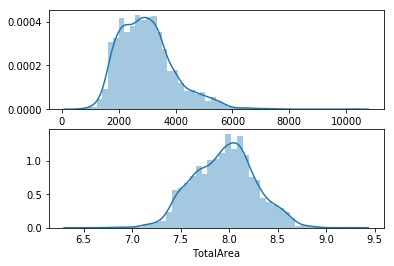

0.9639488532416292 -0.04978960217751605


In [62]:
f, (ax1, ax2) = plt.subplots(2)
sns.distplot(data_set['TotalArea'], axlabel='TotalArea', ax=ax1)
sns.distplot(np.log(data_set['TotalArea']+1), axlabel='TotalArea', ax=ax2)
plt.show()
print(stats.skew(data_set['TotalArea']),stats.skew(np.log(data_set['TotalArea']+1)))

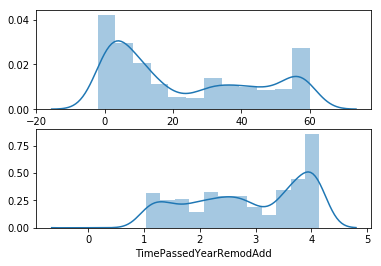

0.44830979084937606 -0.30081270493760787


In [63]:
f, (ax1, ax2) = plt.subplots(2)
sns.distplot(data_set['TimePassedYearRemodAdd'], axlabel='TimePassedYearRemodAdd', ax=ax1)
sns.distplot(np.log(data_set['TimePassedYearRemodAdd']+3), axlabel='TimePassedYearRemodAdd', ax=ax2)
plt.show()
print(stats.skew(data_set['TimePassedYearRemodAdd']),stats.skew(np.log(data_set['TimePassedYearRemodAdd']+3)))

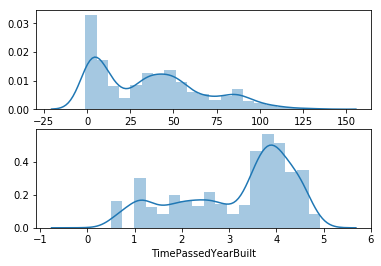

0.5969130120710336 -0.6673314241635492


In [64]:
f, (ax1, ax2) = plt.subplots(2)
sns.distplot(data_set['TimePassedYearBuilt'], axlabel='TimePassedYearBuilt', ax=ax1)
sns.distplot(np.log(data_set['TimePassedYearBuilt']+2), axlabel='TimePassedYearBuilt', ax=ax2)
plt.show()
print(stats.skew(data_set['TimePassedYearBuilt']),stats.skew(np.log(data_set['TimePassedYearBuilt']+2)))

In [65]:
data_set['TotalArea'] = np.log(data_set['TotalArea'])

# Data Encoding

In [66]:
columns = ['1stFlrSF','2ndFlrSF', 'BsmtFinSF1', 'Fireplaces' , 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'TotRmsAbvGrd', 'WoodDeckSF']
for c in columns:
    data_set[columns] = np.log(data_set[columns] + 1)

In [67]:
data_set.drop(['YearRemodAdd','YearBuilt','GarageYrBlt'], axis=1)
columns = ['OverallQual','OverallCond','MoSold','YrSold','MSSubClass']
#'BsmtFullBath', 'FullBath', 'HalfBath'
for c in columns:
    data_set[c]=data_set[c].astype('str')

Attention aux années!

In [68]:
one_hot_encode_data_set = pd.get_dummies(data_set)
one_hot_encode_training_set = one_hot_encode_data_set[0:ntrain]
one_hot_encode_test_set = one_hot_encode_data_set[ntrain:]

Look at Full Bath...


# Feature engineering

In [69]:
from sklearn.decomposition import PCA



Adding one more important feature
+ ACP


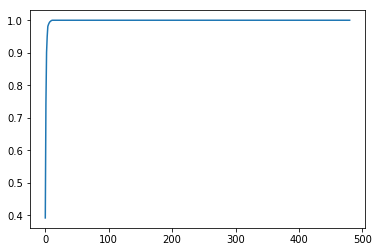

In [70]:
pca = PCA()
pca.fit(one_hot_encode_training_set)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

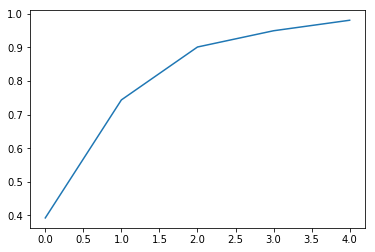

In [71]:
pca.set_params(n_components=5)
pca.fit_transform(one_hot_encode_training_set)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [72]:
pca.transform(one_hot_encode_training_set)
transformed_training_set=pd.DataFrame(pca.transform(one_hot_encode_training_set))

In [73]:

def normalisation_pd_df(dataFrame):
    x = dataFrame.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalised_dataFrame = pd.DataFrame(x_scaled)
    return normalised_dataFrame

A voir pour la normalisation

In [74]:
normalised_training_set=normalisation_pd_df(transformed_training_set)
normalised_training_set.describe()

,0,1,2,3,4
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.373761,0.021983,0.256040,0.485545,0.226769
std,0.082090,0.032422,0.177614,0.124315,0.097681
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.336424,0.014033,0.092410,0.411405,0.171761
50%,0.386443,0.018180,0.234749,0.488759,0.212525
75%,0.423719,0.024177,0.370932,0.567064,0.254998
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Baseline

In [84]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(one_hot_encode_training_set.values)
    rmse= np.sqrt(-cross_val_score(model, one_hot_encode_training_set.values, transformed_SalePrice, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [85]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Perceptron, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [86]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(one_hot_encode_training_set.values)
    rmse= np.sqrt(-cross_val_score(model, one_hot_encode_training_set.values, transformed_SalePrice, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [120]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encode_training_set, transformed_SalePrice, test_size = 0.2, random_state=42)


PCA ??

In [88]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
rmsle_cv(xgb_model).mean()

0.1297363131300277

In [89]:
results_xgb = xgb_model.predict(one_hot_encode_test_set)
df=pd.DataFrame(np.exp(results_xgb), index=one_hot_encode_test_set.index, columns=['SalePrice'])
df.to_csv('results/xgb_base.csv')

0.14518 in Kaggle

# Problem solving

In [90]:
final_params = {
    'learning_rate': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective':'reg:linear',
    'random_state': 2,
    'booster': 'gbtree',
    'colsample_bytree': 0.1,
    'n_estimators': 2000,
    'n_jobs ': -1
}
xgb_model = xgb.XGBRegressor(**final_params)
xgb_model.fit(X_train, y_train, eval_metric='rmse')
rmsle_cv(xgb_model).mean()

0.1159129863444174

0.13595 in kaggle XGBRegressor

In [91]:
final_params = {
    'random_state': 2,
    'alpha': 0.0005,
    'max_iter': 5000
}
clf_lasso = Lasso(**final_params)
clf_lasso.fit(X_train, y_train)
rmsle_cv(clf_lasso).mean()

0.1159100060810935

0.13250

Utiliser un stat linéaire

D'autres params à tester

In [92]:
final_params = {
    'n_estimators': 1000,
    'max_features': 'auto',
    'random_state': 2,
    'n_jobs':-1
}
rf = RandomForestRegressor(**final_params)
rf.fit(X_train, y_train)
rmsle_cv(rf).mean()

0.14034091127547915

In [93]:
gb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =2)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)
rmsle(predictions,y_test)


0.12840068564560084

In [94]:
pct = Perceptron()
pct.fit(X_train, y_train)

rmsle_cv(pct).mean()

c:\users\i351309\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


ValueError: Unknown label type: (array([10.46024211, 10.47194981, 10.54270639, 10.858999  , 10.86856845,
       10.91508846, 10.97678203, 11.00209984, 11.01862914, 11.10495723,
       11.1124479 , 11.1331281 , 11.19134184, 11.19821472, 11.22524339,
       11.23848862, 11.24504602, 11.26446411, 11.27720313, 11.28853113,
       11.28978191, 11.29601246, 11.30220443, 11.31447453, 11.32055357,
       11.32659589, 11.33260191, 11.34450681, 11.34922937, 11.35040654,
       11.35627165, 11.36210258, 11.3736634 , 11.37939407, 11.38509209,
       11.39639165, 11.40166983, 11.4019939 , 11.40756495, 11.4114463 ,
       11.41861479, 11.42190607, 11.42409425, 11.43927892, 11.44035477,
       11.44571672, 11.45105006, 11.45635511, 11.45899712, 11.46163217,
       11.47729829, 11.48246626, 11.48760766, 11.49272276, 11.49577931,
       11.49882654, 11.50791292, 11.51192496, 11.51292546, 11.5228758 ,
       11.53076538, 11.53272809, 11.54030714, 11.54248427, 11.56076279,
       11.56171563, 11.56646623, 11.57119437, 11.57355009, 11.57590026,
       11.58058411, 11.58431546, 11.58524613, 11.58896015, 11.58988651,
       11.59450545, 11.59872694, 11.59910316, 11.60367983, 11.60732614,
       11.60823564, 11.6127708 , 11.61728548, 11.6195352 , 11.62625415,
       11.6307085 , 11.6351431 , 11.6483301 , 11.64836504, 11.65268741,
       11.66134547, 11.66564655, 11.66907415, 11.66992921, 11.67419361,
       11.6784399 , 11.681824  , 11.68266824, 11.68568478, 11.68657621,
       11.68687877, 11.68855803, 11.69107165, 11.69441334, 11.69524702,
       11.69940503, 11.70354582, 11.70766954, 11.71177632, 11.71586631,
       11.7191263 , 11.71993963, 11.72399644, 11.72480582, 11.72803684,
       11.73206099, 11.7352687 , 11.73606902, 11.74006104, 11.74403719,
       11.74542511, 11.74799759, 11.75194237, 11.75587164, 11.75978554,
       11.76368418, 11.76679219, 11.76756768, 11.77143616, 11.7745202 ,
       11.77528973, 11.77912851, 11.7829526 , 11.78600139, 11.78676213,
       11.7905572 , 11.79433792, 11.79810441, 11.80185676, 11.80484853,
       11.80559508, 11.80894766, 11.80931948, 11.81154748, 11.81228904,
       11.81303006, 11.81672692, 11.8196746 , 11.820116  , 11.82041016,
       11.82407989, 11.82700601, 11.82704253, 11.8277362 , 11.8313792 ,
       11.83428406, 11.83500896, 11.8386256 , 11.84078933, 11.84141593,
       11.84222921, 11.84510278, 11.84581988, 11.84868316, 11.84904049,
       11.8493977 , 11.85082525, 11.85651517, 11.860055  , 11.86358234,
       11.86446223, 11.86709728, 11.86779879, 11.87027118, 11.87059991,
       11.87234663, 11.87409031, 11.87583096, 11.87687389, 11.87756858,
       11.87862358, 11.88103479, 11.88379913, 11.88448902, 11.88621167,
       11.88793137, 11.89067673, 11.8913619 , 11.89478071, 11.8968264 ,
       11.89818787, 11.90090526, 11.90158345, 11.90496755, 11.90834024,
       11.9103584 , 11.91170158, 11.91371298, 11.91404782, 11.91505167,
       11.91638857, 11.91772368, 11.91839057, 11.92171836, 11.92337811,
       11.92437264, 11.92503512, 11.9283409 , 11.9316358 , 11.9381932 ,
       11.94039339, 11.94145585, 11.94405832, 11.94470788, 11.94794938,
       11.95053503, 11.9511804 , 11.95655303, 11.95697006, 11.95761129,
       11.96356787, 11.96400108, 11.96718074, 11.9697172 , 11.97035031,
       11.97350987, 11.97603035, 11.97665948, 11.9797992 , 11.98227263,
       11.98292909, 11.98417831, 11.98915964, 11.99226042, 11.99380721,
       11.99535161, 11.99843328, 12.00089179, 12.00150548, 12.00456827,
       12.00701176, 12.00756073, 12.00762171, 12.01066585, 12.01188092,
       12.01309451, 12.01364014, 12.01370075, 12.01460943, 12.01672647,
       12.01974307, 12.02574909, 12.02718519, 12.02873863, 12.03171926,
       12.03469103, 12.03765399, 12.04060821, 12.04296531, 12.04349489,
       12.04355372, 12.04941884, 12.05233855, 12.05379521, 12.05466819,
       12.05524976, 12.05757264, 12.05815252, 12.05980333, 12.06104687,
       12.06393288, 12.0662357 , 12.06681058, 12.06968002, 12.07196966,
       12.07254125, 12.07539432, 12.07767093, 12.07823927, 12.08069081,
       12.08107616, 12.08390501, 12.08672589, 12.08953883, 12.09368751,
       12.09458227, 12.09514108, 12.09625778, 12.09793049, 12.09848743,
       12.09884928, 12.10015642, 12.10071213, 12.10348606, 12.10625231,
       12.10901093, 12.11121236, 12.11176197, 12.11669483, 12.11724143,
       12.12214741, 12.12269104, 12.12323437, 12.1281111 , 12.13081016,
       12.13215696, 12.13269518, 12.13350195, 12.13618652, 12.13725833,
       12.1388639 , 12.13939851, 12.14153412, 12.14419724, 12.14685329,
       12.14791373, 12.14950229, 12.15451616, 12.15477935, 12.16002871,
       12.16525065, 12.16597955, 12.16785143, 12.17044547, 12.17303279,
       12.17498953, 12.17561344, 12.17818744, 12.17921519, 12.18075484,
       12.18586994, 12.18841771, 12.19095901, 12.19349386, 12.19551713,
       12.19854438, 12.20055746, 12.20557252, 12.20607265, 12.20657252,
       12.2067774 , 12.20856953, 12.21106019, 12.21503239, 12.21849517,
       12.21930965, 12.22046853, 12.22096126, 12.22587527, 12.229545  ,
       12.23076526, 12.23563145, 12.23999086, 12.24047407, 12.24288662,
       12.24673463, 12.24769432, 12.24961095, 12.25247902, 12.25486281,
       12.25961341, 12.26434155, 12.26904744, 12.27022047, 12.27134527,
       12.27373129, 12.27606502, 12.27792808, 12.27839331, 12.27932311,
       12.28303369, 12.28534583, 12.2869012 , 12.28765263, 12.29225034,
       12.29778545, 12.29910751, 12.30138283, 12.30591798, 12.30817787,
       12.31043266, 12.31268238, 12.31492705, 12.31716669, 12.31940133,
       12.32341114, 12.32385568, 12.32829028, 12.33138284, 12.3327053 ,
       12.33569641, 12.33655251, 12.33710091, 12.33929149, 12.34125892,
       12.34147728, 12.34346657, 12.34583459, 12.34800614, 12.35233515,
       12.35449265, 12.35707552, 12.35879373, 12.35952308, 12.35978037,
       12.36307639, 12.36734079, 12.36788533, 12.37158708, 12.37370349,
       12.37581542, 12.3779229 , 12.38002595, 12.38421883, 12.38708501,
       12.38755635, 12.38797745, 12.3883942 , 12.39255221, 12.39462475,
       12.39669301, 12.4049235 , 12.40656151, 12.4073795 , 12.40901349,
       12.41044104, 12.41105223, 12.41543365, 12.42118403, 12.42250573,
       12.42801548, 12.4292162 , 12.43153351, 12.43320822, 12.43718437,
       12.43987123, 12.44114477, 12.4423022 , 12.44862659, 12.44901882,
       12.45097769, 12.45254202, 12.45293272, 12.45410391, 12.45683136,
       12.46071486, 12.46458334, 12.46651198, 12.46843691, 12.46997419,
       12.47418956, 12.47609978, 12.47716791, 12.47800636, 12.47990931,
       12.48156194, 12.48420426, 12.48582713, 12.4874851 , 12.49117264,
       12.49125159, 12.49312952, 12.49500394, 12.49874226, 12.50432367,
       12.50539916, 12.50617724, 12.5098741 , 12.51318963, 12.51355735,
       12.52088339, 12.52197768, 12.52352588, 12.52416267, 12.52441728,
       12.52452638, 12.52634291, 12.53177279, 12.53357621, 12.53537639,
       12.54075757, 12.54254488, 12.54610995, 12.54686767, 12.55292652,
       12.55672952, 12.56024446, 12.56374709, 12.57418197, 12.5776362 ,
       12.58819065, 12.59133505, 12.59473064, 12.59640043, 12.60148742,
       12.61087086, 12.6165253 , 12.6181823 , 12.6230611 , 12.63101353,
       12.63134038, 12.63460303, 12.64109656, 12.64432758, 12.65235975,
       12.65395847, 12.65973409, 12.66032792, 12.66191396, 12.66270604,
       12.66980666, 12.67294638, 12.67576373, 12.67607627, 12.68849879,
       12.69158046, 12.69250311, 12.69349862, 12.69465266, 12.70076889,
       12.70350903, 12.72188581, 12.72486644, 12.72783821, 12.72932079,
       12.73596533, 12.7367009 , 12.73963776, 12.74444437, 12.7512997 ,
       12.75995776, 12.76568843, 12.77705219, 12.79917571, 12.8139179 ,
       12.82362845, 12.82772919, 12.8346813 , 12.8411298 , 12.84397135,
       12.85055465, 12.8583197 , 12.86099861, 12.86424011, 12.87901712,
       12.88029182, 12.88520203, 12.88567095, 12.887127  , 12.90420737,
       12.90634687, 12.92391244, 12.92999148, 12.93675161, 12.95512746,
       12.95953852, 12.96219463, 12.97154049, 12.98804081, 12.99453001,
       13.00865926, 13.04979268, 13.0530133 , 13.07107008, 13.09190417,
       13.12603064, 13.19561384, 13.22672339, 13.22956799, 13.27582754,
       13.32392695, 13.34550693]),)

# Level Two :

In [95]:
from sklearn.ensemble import BaggingRegressor, VotingClassifier
from sklearn.linear_model import LinearRegression

# Stacking : Regression

In [165]:
def get_oof(clf, clf_name, x_train, y_train, x_test, n_folds):
    ntrain = x_train.shape[0]
    kf = KFold(n_folds, random_state=5)
    oof_train = pd.DataFrame()
    oof_test = pd.DataFrame()
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):

        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.fit(x_tr, y_tr)

        oof_train =oof_train.append(
            pd.DataFrame({
                clf_name: clf.predict(x_te)
            }, index=x_te.index)
        )
        oof_test = pd.concat([oof_test, pd.DataFrame({
            clf_name:clf.predict(x_test)}, index=x_test.index)], axis=1)
        
    return oof_train, oof_test.mean(axis=1)

In [166]:
models = {
    'XGB':xgb_model,
 #   'RandomForest': rf,
    'GradientBoosting': gb,
    'LassoRegression': clf_lasso
}
stacked_models_train = pd.DataFrame()
stacked_models_test = pd.DataFrame()
n_folds = 5

results = []
for model in models:
    train, test = get_oof(models[model], model, X_train, y_train, X_test, n_folds)
    stacked_models_train = pd.concat([stacked_models_train, train], axis=1)
    stacked_models_test =  pd.concat([stacked_models_test, test], axis=1)

# Averaging

In [98]:
rmsle(stacked_models_test.mean(axis=1), y_test)

0.12438644465516137

# Adding a model

In [139]:
params = {
    'alpha': 0.0005,
}

gb = GradientBoostingRegressor()
gb.fit(stacked_models_train, y_train)
predictions = gb.predict(stacked_models_test)
rmsle(predictions, y_test)

0.12533285434028518

In [140]:
lr = LinearRegression()
lr.fit(stacked_models_train, y_train)
predictions = lr.predict(stacked_models_test)
rmsle(predictions, y_test)

0.12040907090431131

In [141]:
lasso = Lasso()
lasso.fit(stacked_models_train, y_train)
predictions = lasso.predict(stacked_models_test)
rmsle(predictions, y_test)

0.39872560095392684

In [142]:
y_train.head()

Id
255     11.884489
1066    12.700769
638     11.440355
1293    11.585246
515     11.477298
Name: SalePrice, dtype: float64

In [103]:
models = {
    'XGB':xgb_model,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'LassoRegression': clf_lasso
}
stacked_models_train_sub = pd.DataFrame()
stacked_models_test_sub = pd.DataFrame()
n_folds = 5

results = []
for model in models:
    train, test = get_oof(models[model], model, one_hot_encode_training_set, transformed_SalePrice, one_hot_encode_test_set, n_folds)
    stacked_models_train_sub = pd.concat([stacked_models_train, train], axis=1)
    stacked_models_test_sub =  pd.concat([stacked_models_test, test], axis=1)
    
lr = LinearRegression()
lr.fit(stacked_models_train_sub, transformed_SalePrice)
predictions = lr.predict(stacked_models_test_sub)
df=pd.DataFrame(np.exp(predictions), index=one_hot_encode_test_set.index, columns=['SalePrice'])
df.to_csv('results/lr_stacking.csv')

KeyboardInterrupt: 

0.12857 on kaggle with linear stacking

# Stacking; MetaModel

In [167]:
X_train_stacked = pd.concat([X_train, stacked_models_train], axis=1)
X_test_stacked = pd.concat([X_test, stacked_models_test], axis=1)

In [168]:
X_test_stacked.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,GarageYrBltCut_4.0,GarageYrBltCut_5.0,GarageYrBltCut_6.0,GarageYrBltCut_7.0,GarageYrBltCut_8.0,GarageYrBltCut_9.0,GarageYrBltCut_None,0,0,0
Id,,,,,,,,,,,,,,,,,,,,,
498,0.195764,0.195031,0,4,0.193782,0.0,1.0,0.0,697.0,0,...,0,0,0,0,0,0,0,12.035037,11.913551,12.026044
1265,0.195989,0.000000,0,2,0.193375,0.0,1.0,0.0,1139.0,0,...,0,0,1,0,0,0,0,12.060575,12.123313,11.988750
412,0.195666,0.000000,0,3,0.195666,0.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,11.783440,11.822034,11.722790
1049,0.196354,0.000000,0,3,0.000000,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,11.837523,11.902224,11.735509
1036,0.195344,0.000000,0,3,0.000000,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,11.321422,11.309326,11.286936


In [169]:
final_params = {
    'learning_rate': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective':'reg:linear',
    'random_state': 2,
    'booster': 'gbtree',
    'colsample_bytree': 0.1,
    'n_estimators': 2000
}
xgb_model_2 = xgb.XGBRegressor(**final_params)
xgb_model_2.fit(X_train_stacked, y_train, eval_metric='rmse')
predictions = xgb_model_2.predict(X_test_stacked)
rmsle(predictions, y_test)

ValueError: feature_names must be unique

In [151]:

lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)
rmsle(predictions, y_test)

0.2360311991862044

In [148]:
X_train_stacked.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,GarageYrBltCut_4.0,GarageYrBltCut_5.0,GarageYrBltCut_6.0,GarageYrBltCut_7.0,GarageYrBltCut_8.0,GarageYrBltCut_9.0,GarageYrBltCut_None,XGB,GradientBoosting,LassoRegression
Id,,,,,,,,,,,,,,,,,,,,,
255,0.195966,0.000000,0,3,0.195472,0.0,1.0,0.0,392.0,0,...,0,0,0,0,0,0,0,11.834399,11.842305,11.871608
1066,0.195958,0.195521,0,3,0.195844,0.0,1.0,0.0,105.0,0,...,0,0,1,0,0,0,0,12.530431,12.595027,12.520466
638,0.195283,0.194752,0,3,0.000000,0.0,0.0,0.0,811.0,0,...,0,0,0,0,0,0,0,11.648315,11.672917,11.656339
1293,0.196029,0.195580,0,4,0.000000,0.0,0.0,0.0,994.0,0,...,0,1,0,0,0,0,0,11.743014,11.776969,11.718160
515,0.195242,0.000000,0,2,0.000000,0.0,0.0,0.0,768.0,112,...,0,0,0,0,0,0,0,11.503587,11.413247,11.503505


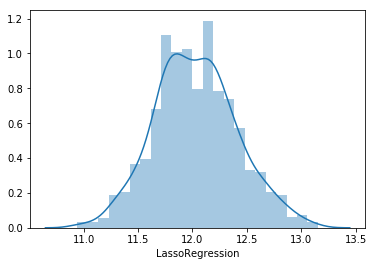

In [150]:
sns.distplot(X_train_stacked.LassoRegression)

Kaggle submission was 0.13324

Random Forest, perceptron, logistic regression

# Stacking : Voting classifier